# Midday Meal Scheme Analysis

**Problem Statement:**  
Analyze coverage and effectiveness of the Midday Meal Scheme in schools.

**Project ID:**  
CBIT/IT-1/EDAV/2025/CEP-46

**Roll No:**  
160124737022

**Name of the Student:**  
Praharshi Sepur

**Department:**  
Dept of IT, Chaitanya Bharathi Institute of Technology, Hyderabad

**Description:**  
The Midday Meal Scheme aims to improve children’s nutrition and school attendance in the nation. This study analyzes its coverage and effectiveness across states, school types, and years, addressing missing records and identifying trends in meal distribution and regional performance.

**Dataset Link:**  
*()*

**Environment:**  
- Python version: 3.13.5  

**Libraries Used:**  
- `numpy`  
- `pandas`  
- `seaborn`  
- `matplotlib`


**Code to load the dataset.**

In [ ]:
# mounting Google Drive to Colab notebook.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Importing required libra
import numpy as np
import pandas as pd

In [ ]:
# Finding the file in drive
!find /content/drive/ -name "*Midday*.xlsx"


/content/drive/MyDrive/Colab Notebooks/MiddayMeal_Dataset.xlsx


In [ ]:
# Load the Excel dataset into a pandas DataFrame
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MiddayMeal_Dataset.xlsx')
print(df.columns)

Index(['State', 'Region', 'District', 'School_ID', 'School_Name',
       'School_Type', 'Year', 'Meals_Served', 'Students_Enrolled',
       'Meal_Coverage_Percentage', 'Remarks'],
      dtype='object')


**Data exploration steps**

In [ ]:
print("First 5 rows:\n", df.head(), "\n")
print("Dataset Info:\n")
df.info()
print("\nDataset Description:\n", df.describe(include='all'))
print("\n=== Missing values Count ===")
print(df.isnull().sum())

First 5 rows:
        State     Region     District School_ID School_Name School_Type  Year  \
0      Bihar       East  District-20    SC0001  School_001  Government  2023   
1    Gujarat       West  District-19    SC0002  School_002       Aided  2020   
2      Assam  Northeast  District-19    SC0003  School_003     Private  2024   
3      Assam  Northeast  District-29    SC0004  School_004     Private  2022   
4  Karnataka      South  District-16    SC0005  School_005     Private  2020   

   Meals_Served  Students_Enrolled  Meal_Coverage_Percentage  \
0       28830.0                469                     30.74   
1       70104.0                485                     72.27   
2       39804.0                353                     56.38   
3       25896.0                230                       NaN   
4       80976.0                576                       NaN   

                Remarks  
0  Kitchen under repair  
1                   NaN  
2                   NaN  
3  Kitchen unde

**Q1: Calculate average number of meals served (Bloom Level-3)**

In [ ]:
# .mean() function is used to find the average of Meals_Served
avg_meals_served = df["Meals_Served"].mean()
print("Average number of meals served:", avg_meals_served)

Average number of meals served: 33032.21254355401




**Purpose:**  
To find the overall average number of meals served across all schools, which helps evaluate the general reach and effectiveness of the Midday Meal Scheme.

**Attributes / Parameters:**

- `df["Column_Name"]` → Selects a column from the DataFrame.  
- `.mean()` → Calculates the arithmetic mean (average) of numeric values.  
- `skipna=True` (default) → Ignores missing values (`NaN`) during calculation.

**Syntax:**  
```python
# Calculate average meals served across all schools
average_meals = df["Meals_Served"].mean()
print("Average Meals Served:", average_meals)


**Q2: Filter data by state and school type (Bloom Level-3)**

In [ ]:
# Filter the dataset for a specific State and School Type
filtered_data = df[(df["State"] == "Bihar") & (df["School_Type"] == "Aided")]
# Display the first few rows of the filtered dataset
print(filtered_data.head())


     State Region     District School_ID School_Name School_Type  Year  \
5    Bihar   East  District-20    SC0006  School_006       Aided  2023   
73   Bihar   East   District-7    SC0074  School_074       Aided  2022   
112  Bihar   East  District-27    SC0113  School_113       Aided  2020   
190  Bihar   East  District-24    SC0191  School_191       Aided  2024   
192  Bihar   East  District-10    SC0193  School_193       Aided  2024   

     Meals_Served  Students_Enrolled  Meal_Coverage_Percentage  \
5         26406.0                427                     30.92   
73        25896.0                205                     63.16   
112       17100.0                347                     24.64   
190       18758.0                132                     71.05   
192       32185.0                250                       NaN   

                  Remarks  
5            Data pending  
73   Kitchen under repair  
112             Audit due  
190                   NaN  
192  Kitchen under



**Purpose:**  
To extract a subset of the dataset based on specific conditions, such as a particular state and school type. This helps in analyzing and comparing the Midday Meal Scheme across different states or school categories.

**Attributes / Parameters:**

- `df["Column_Name"]` → Selects a column from the DataFrame.  
- `==` → Compares column values with a given value to return True/False.  
- `&` → Logical AND operator; combines multiple conditions.  
- `|` → Logical OR operator (if needed).  
- Parentheses `()` → Required around each condition for correct evaluation.

**Syntax:**  
```python
# Filter for a specific state and school type
filtered_df = df[(df["State"] == "State_Name") & (df["School_Type"] == "School_Type_Name")]

# Example: Karnataka Government schools
filtered_df = df[(df["State"] == "Bihar") & (df["School_Type"] == "Aided")]


**Q3: Handle missing meal coverage records (Bloom Level-4)**

In [ ]:
# Fill missing with average coverage
df["Meal_Coverage_Percentage"].fillna(df["Meal_Coverage_Percentage"].mean(), inplace=True)

/tmp/ipython-input-3636127450.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Meal_Coverage_Percentage"].fillna(df["Meal_Coverage_Percentage"].mean(), inplace=True)




**Purpose:**  
To manage missing or incomplete records in the `Meal_Coverage_Percentage` column, ensuring accurate analysis and complete dataset for calculations and visualizations.

**Attributes / Parameters:**

- `df["Column_Name"]` → Selects a column from the DataFrame.  
- `.fillna(value, inplace=True)` → Replaces missing values (`NaN`) with the specified value.  
- `value` → The value used to fill missing entries (e.g., mean, median, or constant).  
- `inplace=True` → Updates the DataFrame in place; no new DataFrame is returned.  

**Syntax:**  
```python
# Fill missing Meal_Coverage_Percentage values with the column mean
df["Meal_Coverage_Percentage"].fillna(df["Meal_Coverage_Percentage"].mean(), inplace=True)


**Q4: Group by region and year (Bloom Level-4)**

In [ ]:
# Group the data by 'Region' and 'Year', and calculate the average Meals_Served
group_by_region_and_year = df.groupby(["Region", "Year"])["Meals_Served"].mean().reset_index()
# Display the grouped results
print(group_by_region_and_year)


       Region  Year  Meals_Served
0        East  2020  26838.928571
1        East  2021  31664.500000
2        East  2022  31283.916667
3        East  2023  34727.076923
4        East  2024  32538.000000
5       North  2020  44473.125000
6       North  2021  26829.363636
7       North  2022  39603.636364
8       North  2023  39943.700000
9       North  2024  32542.800000
10  Northeast  2020  34667.615385
11  Northeast  2021  18503.666667
12  Northeast  2022  25999.000000
13  Northeast  2023  97890.000000
14  Northeast  2024  27553.500000
15      South  2020  27142.071429
16      South  2021  25862.142857
17      South  2022  34824.260870
18      South  2023  33414.133333
19      South  2024  36647.769231
20       West  2020  38516.500000
21       West  2021  33882.470588
22       West  2022  34664.461538
23       West  2023  39121.454545
24       West  2024  29366.000000



**Purpose:**  
To summarize and analyze trends in the Midday Meal Scheme across different regions and years, such as average meals served or coverage percentage, helping identify regional performance patterns over time.

**Attributes / Parameters:**

- `df.groupby([columns])` → Groups the DataFrame by one or more columns.  
- `["Column_Name"]` → Selects the numeric column(s) to aggregate.  
- `.mean()` / `.sum()` / `.count()` → Aggregation functions to compute statistics for each group.  
- `.reset_index()` → Converts grouped data back to a regular DataFrame.

**Syntax:**  
```python
# Group by Region and Year, calculate average Meals_Served
grouped_df = df.groupby(["Region", "Year"])["Meals_Served"].mean().reset_index()

# View the first few rows of the grouped data
grouped_df.head()


**Q5: Visualize coverage trends using plots (Bloom Level -5)**

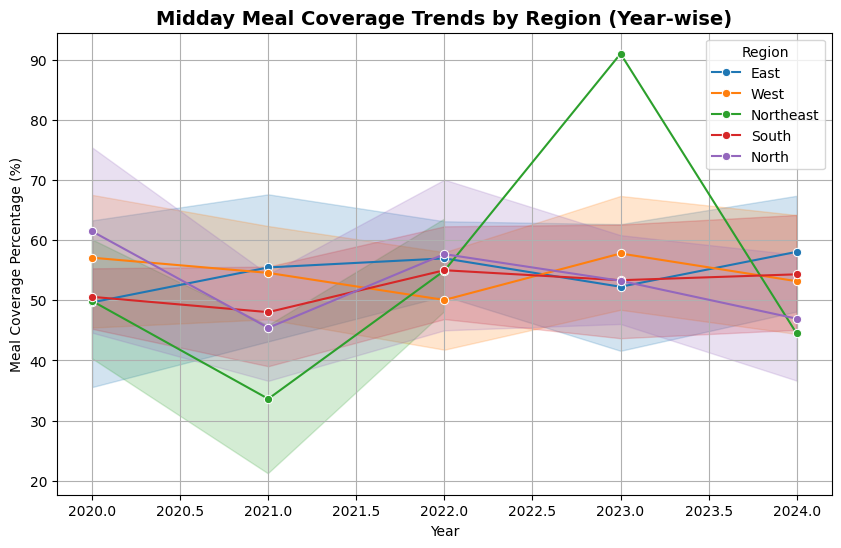

In [ ]:
# Import required libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the figure (width=10 inches, height=6 inches)
plt.figure(figsize=(10, 6))

# Create a line plot showing how meal coverage changes over years for each region
sns.lineplot(
    data=df,
    x="Year",
    y="Meal_Coverage_Percentage",
    hue="Region",
    marker="o"
)

# Add a descriptive title to the plot
plt.title("Midday Meal Coverage Trends by Region (Year-wise)",
          fontsize=14,
          weight='bold')

# Label the X-axis
plt.xlabel("Year")

# Label the Y-axis
plt.ylabel("Meal Coverage Percentage (%)")

# Add a legend to identify which color corresponds to which Region
plt.legend(title="Region")

# Add a grid for easier readability of data points
plt.grid(True)

# Display the final plot output
plt.show()


**Purpose:**  
To graphically represent the changes in Midday Meal Scheme coverage across years and regions. Visualization helps identify trends, performance variations, and progress in meal coverage over time.

**Attributes / Parameters:**

- `sns.lineplot()` → Plots a line graph to show trends across categories.  
- `x`, `y` → Define the variables for horizontal (X-axis) and vertical (Y-axis).  
- `hue` → Differentiates data by category (e.g., Region) using color.  
- `marker` → Adds markers to each data point for better visibility.  
- `plt.title()` → Sets the title of the plot.  
- `plt.xlabel()`, `plt.ylabel()` → Label the X and Y axes.  
- `plt.legend()` → Displays color legend for different regions.  
- `plt.grid()` → Adds grid lines for clarity.  
- `plt.show()` → Displays the final plot output.

**Syntax:**  
```python
# Line plot for coverage trends by region and year
sns.lineplot(data=df, x="Year", y="Meal_Coverage_Percentage", hue="Region", marker="o")
plt.title("Midday Meal Coverage Trends by Region (Year-wise)")
plt.xlabel("Year")
plt.ylabel("Meal Coverage Percentage (%)")
plt.show()


### Summary and Reflection  

The visualization of **Midday Meal Coverage Trends** across different regions shows how the scheme’s performance has varied over the years.  

-  Some regions show **steady improvement** in coverage, indicating strong implementation.  
-  Others have **fluctuating or declining trends**, possibly due to resource or management challenges.  
-  Overall, there is **positive growth**, but regional gaps remain visible.  

**Challenges faced:**  
- Managing missing data required using `.fillna()` with the mean for balance.  
- Ensuring consistent formatting of region and school-type data was essential for grouping accuracy.  
- Selecting the right visualization helped make the data trends more understandable.  

**Conclusion:**  
The analysis highlights that the **Midday Meal Scheme** has significantly improved school nutrition and attendance. However, continuous monitoring and targeted efforts are needed to ensure **uniform coverage** across all regions.
